In [91]:
!pip install matplotlib_venn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=33000 sha256=09fac4926699b697d246c21f238898cd2b946d02d6df36b8d4835fef7c178395
  Stored in directory: /home/giulia/.cache/pip/wheels/04/31/9b/736820c977113de7c1aad3b8a7e92fa151ef6827256e9886e3
Successfully built matplotlib-venn


### Exploratory analysis of CaPms predictions 

In [2]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import scipy.stats as stats
from Bio import SeqIO
import plotly.express as px
# import module for venn diagram
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt


In [3]:
# base variables
table_base_dir = "/home/giulia/Workspace/PhytoPhD/period_abroad/random_forest/on_7_strains/from_drive20230303/"
seq_base_dir = "/home/giulia/Workspace/PhytoPhD/period_abroad/datasets/7_strains/"
annot_base_dir = "/home/giulia/Workspace/PhytoPhD/period_abroad/datasets/7_strains/annotations/"
capms = [5, 6, 7, 11, 13, 40, 44] 
models_name = ["clumps", "std", "clumps_std"]
base_dir = "/home/giulia/Workspace/PhytoPhD/period_abroad/"
mali_eff = ["B3R0L2", "B3QZJ3", "B3QZX7", "B3R0Q6"]

In [12]:
# probability_of_predictions.tsv is the dataframe containing the probability of each prediction
# with the corresponding sequence_ids

dist_prob_eff = []
for s in capms:
    common_els = {}
    for mod in models_name:
        df_prob = pd.read_csv(f"{table_base_dir}capm{s}/model_{mod}_on_dataset20230224/probability_of_predictions.tsv", 
                              sep="\t", 
                              header=0)
        
        
        common_els[mod] = list(df_prob["seq_id"][df_prob["effector_prob"] >= 0.98])
    
    m1 = list(common_els[models_name[0]])
    m2 = list(common_els[models_name[1]])
    m3 = list(common_els[models_name[2]])
    
    sum_unique = np.unique(m1 + m2 + m3)
    m1_m2_m3 = list(set(common_els[models_name[0]]) & set(common_els[models_name[1]]) & set(common_els[models_name[2]]))
    print(f"capm{s}: {len(m1_m2_m3)/len(sum_unique)}")
    print(f"capm{s}\noverlap m1 con m2: {len(list(set(m1) & set(m2)))/len(m1)}\n m2 con m3: {len(list(set(m2) & set(m3)))/len(m2)}\n m3 con m1: {len(list(set(m3) & set(m1)))/len(m3)}")


capm5: 0.38461538461538464
capm5
overlap m1 con m2: 0.5
 m2 con m3: 0.9166666666666666
 m3 con m1: 0.7894736842105263
capm6: 0.5074626865671642
capm6
overlap m1 con m2: 0.6428571428571429
 m2 con m3: 0.9
 m3 con m1: 0.8363636363636363
capm7: 0.36585365853658536
capm7
overlap m1 con m2: 0.47058823529411764
 m2 con m3: 0.95
 m3 con m1: 0.7741935483870968
capm11: 0.4
capm11
overlap m1 con m2: 0.49122807017543857
 m2 con m3: 0.8709677419354839
 m3 con m1: 0.8666666666666667
capm13: 0.3333333333333333
capm13
overlap m1 con m2: 0.43333333333333335
 m2 con m3: 0.9333333333333333
 m3 con m1: 0.7777777777777778
capm40: 0.3898305084745763
capm40
overlap m1 con m2: 0.4807692307692308
 m2 con m3: 0.8928571428571429
 m3 con m1: 0.8571428571428571
capm44: 0.410958904109589
capm44
overlap m1 con m2: 0.48484848484848486
 m2 con m3: 0.9142857142857143
 m3 con m1: 0.8909090909090909


In [31]:
# explore distribution of predictions
eff_prob_strains_cl = []
eff_prob_strains_mf = []
eff_prob_strains_cl_mf = []
for s in capms:
    # clumps
    df_prob = pd.read_csv(f"{table_base_dir}capm{s}/model_clumps_on_dataset20230224/probability_of_predictions.tsv", 
                                  sep="\t", 
                                  header=0)
    eff_prob_strains_cl.append(list(df_prob["effector_prob"]))
    
    # motifs
    df_prob = pd.read_csv(f"{table_base_dir}capm{s}/model_std_on_dataset20230224/probability_of_predictions.tsv", 
                                  sep="\t", 
                                  header=0)
    eff_prob_strains_mf.append(list(df_prob["effector_prob"]))
    
    # clumps and motifs
    df_prob = pd.read_csv(f"{table_base_dir}capm{s}/model_clumps_std_on_dataset20230224/probability_of_predictions.tsv", 
                                  sep="\t", 
                                  header=0)
    eff_prob_strains_cl_mf.append(list(df_prob["effector_prob"]))

    
group_labels = [f"capm{s}" for s in capms] # name of the traces


# clumps
fig_clumps = ff.create_distplot(eff_prob_strains_cl, group_labels, show_hist=False, show_rug=False)
fig_clumps.update_layout(title="Model with std + ONLY CLUMPs Features; Probability to be an Effector")
fig_clumps.show()

# motifs
fig_motifs = ff.create_distplot(eff_prob_strains_mf, group_labels, show_hist=False, show_rug=False)
fig_motifs.update_layout(title="Model with std + ONLY MOTIFS Features; Probability to be an Effector")
fig_motifs.show()

# clumps+motifs
fig_clumps_mot = ff.create_distplot(eff_prob_strains_cl_mf, group_labels, show_hist=False, show_rug=False)
fig_clumps_mot.update_layout(title="Model with std + CLUMPs and MOTIFs Features; Probability to be an Effector")
fig_clumps_mot.show()

In [32]:
# explore the differences in prediction probabilty 
eff_prob_strains_cl = []
eff_prob_strains_mf = []
eff_prob_strains_cl_mf = []
i = 0
print("h0 = no differences in probability of effector prediction\nh1 = significant difference // // //")
for s in capms:
    # clumps
    df_prob_cl = pd.read_csv(f"{table_base_dir}capm{s}/model_clumps_on_dataset20230224/probability_of_predictions.tsv", 
                                  sep="\t", 
                                  header=0)
    eff_prob_strains_cl.append(list(df_prob_cl["effector_prob"]))
    
    # motifs
    df_prob_mf = pd.read_csv(f"{table_base_dir}capm{s}/model_std_on_dataset20230224/probability_of_predictions.tsv", 
                                  sep="\t", 
                                  header=0)
    eff_prob_strains_mf.append(list(df_prob_mf["effector_prob"]))
    
    # clumps and motifs
    df_prob_cl_mf = pd.read_csv(f"{table_base_dir}capm{s}/model_clumps_std_on_dataset20230224/probability_of_predictions.tsv", 
                                  sep="\t", 
                                  header=0)
    eff_prob_strains_cl_mf.append(list(df_prob_cl_mf["effector_prob"]))
    #perform the Wilcoxon-Signed Rank Test
    m1_m2 = stats.wilcoxon(eff_prob_strains_cl[i], eff_prob_strains_mf[i])
    m2_m3 = stats.wilcoxon(eff_prob_strains_mf[i], eff_prob_strains_cl_mf[i])
    m3_m1 = stats.wilcoxon(eff_prob_strains_cl_mf[i], eff_prob_strains_cl[i])
    
    print(f"capm{s} --> m1_m2: {m1_m2}\n\tm2_m3: {m2_m3}\n\tm3_m1: {m3_m1}")
    i += 1

h0 = no differences in probability of effector prediction
h1 = significant difference // // //
capm5 --> m1_m2: WilcoxonResult(statistic=24475.0, pvalue=0.12223496643388763)
	m2_m3: WilcoxonResult(statistic=22697.0, pvalue=0.00039046696481800415)
	m3_m1: WilcoxonResult(statistic=16600.5, pvalue=0.12972491796801752)
capm6 --> m1_m2: WilcoxonResult(statistic=40455.5, pvalue=0.486047864922721)
	m2_m3: WilcoxonResult(statistic=34989.0, pvalue=0.0002814073828175401)
	m3_m1: WilcoxonResult(statistic=22330.0, pvalue=0.006719718994479072)
capm7 --> m1_m2: WilcoxonResult(statistic=22401.5, pvalue=0.4264546985336348)
	m2_m3: WilcoxonResult(statistic=19304.5, pvalue=0.0010111384765287823)
	m3_m1: WilcoxonResult(statistic=12972.5, pvalue=0.010288389965501125)
capm11 --> m1_m2: WilcoxonResult(statistic=30273.0, pvalue=0.19544907768464348)
	m2_m3: WilcoxonResult(statistic=29019.0, pvalue=0.01575898956316739)
	m3_m1: WilcoxonResult(statistic=20164.5, pvalue=0.5129969528222118)
capm13 --> m1_m2: Wilco

In [235]:
# explore the mean of probabilty predictions of eff 
eff_prob_strains_cl = []
eff_prob_strains_mf = []
eff_prob_strains_cl_mf = []
capms_pred = {}
for s in capms:
    capms_pred[s] = {"mean_eff_prob": [], "seq_id": []}
    # clumps
    df_prob_cl = pd.read_csv(f"{table_base_dir}capm{s}/model_clumps_on_dataset20230224/probability_of_predictions.tsv", 
                                  sep="\t", 
                                  header=0)    
    # motifs
    df_prob_mf = pd.read_csv(f"{table_base_dir}capm{s}/model_std_on_dataset20230224/probability_of_predictions.tsv", 
                                  sep="\t", 
                                  header=0) 
    # clumps and motifs
    df_prob_cl_mf = pd.read_csv(f"{table_base_dir}capm{s}/model_clumps_std_on_dataset20230224/probability_of_predictions.tsv", 
                                  sep="\t", 
                                  header=0)
    
    df = pd.DataFrame({"eff_prob_cl": list(df_prob_cl["effector_prob"]),
                      "eff_prob_mf": list(df_prob_mf["effector_prob"]),
                      "eff_prob_cl_mf": list(df_prob_cl_mf["effector_prob"]),
                      "seq_id": list(df_prob_cl["seq_id"])})
    mean_cl = df[["eff_prob_cl", "eff_prob_mf", "eff_prob_cl_mf"]].mean(axis=1)
    capms_pred[s]["mean_eff_prob"] = list(mean_cl)
    capms_pred[s]["seq_id"] = list(df_prob_cl["seq_id"])
    df_capms = pd.DataFrame(capms_pred[s])
    df_capms90 = df_capms[["seq_id", "mean_eff_prob"]][df_capms["mean_eff_prob"] >= 0.90]
#     df_capms90.to_csv(f"{table_base_dir}capm{s}/median_eff_prob_90_ids.tsv", sep="\t", index=False)
    sequences = SeqIO.parse(f"{seq_base_dir}CaPm{s}_prodigal_faa.fasta", "fasta")
    with open(f"{table_base_dir}capm{s}/mean_eff_prob_90.fasta", "w") as out_fasta:
        for record in sequences:
            if record.id in list(df_capms90["seq_id"]):
                out_fasta.write(f">{record.id}\n{str(record.seq)}\n")
                
    annotations = pd.read_csv(f"{annot_base_dir}CaPm{s}_annot_table.csv", sep="\t", header=0)
    print("B3R0L2" in list(annotations["Entry"]))
    
    corr_annot = annotations[annotations["ID"].isin(df_capms90["seq_id"])]
    print(f"capm{s}:")   
    print(len(corr_annot[corr_annot["Entry"].isin(mali_eff)]))
    print(corr_annot["Entry"][corr_annot["Entry"].isin(mali_eff)])
#     corr_annot.to_csv(f"{table_base_dir}capm{s}/mean_eff_prob_90_annotations.tsv", sep="\t", index=False)
    
    corr_annot_value_counts = corr_annot["Protein names"].value_counts()
    df_corr_annot_overlap = pd.DataFrame({"Protein names": list(corr_annot_value_counts.index),
                                           "# occurrences": list(corr_annot_value_counts)})
    df_corr_annot_overlap.to_csv(f"{table_base_dir}capm{s}/capm{s}_mean_eff_prob_90_annotations_value_counts.tsv",
                                sep='\t',
                                index=False)


False
capm5:
3
4      B3QZJ3
337    B3QZX7
432    B3R0Q6
Name: Entry, dtype: object
False
capm6:
6
27     B3R0Q6
137    B3QZX7
212    B3QZJ3
216    B3QZJ3
295    B3QZJ3
446    B3QZJ3
Name: Entry, dtype: object
False
capm7:
3
305    B3QZX7
392    B3QZJ3
432    B3R0Q6
Name: Entry, dtype: object
False
capm11:
3
70     B3QZJ3
398    B3QZX7
493    B3R0Q6
Name: Entry, dtype: object
False
capm13:
2
7      B3R0Q6
101    B3QZX7
Name: Entry, dtype: object
False
capm40:
3
7      B3R0Q6
102    B3QZX7
432    B3QZJ3
Name: Entry, dtype: object
False
capm44:
5
46     B3QZJ3
319    B3QZJ3
401    B3QZX7
495    B3R0Q6
580    B3QZJ3
Name: Entry, dtype: object


capm5: overlap of 3 models p>=50: 0.9512614309115065
['CaPm5_contig01_0049', 'CaPm5_contig01_0103', 'CaPm5_contig01_0291', 'CaPm5_contig01_0303']
clumps:      effector_prob  non_effector_prob               seq_id
48            0.54               0.46  CaPm5_contig01_0049
102           0.50               0.50  CaPm5_contig01_0103
290           0.56               0.44  CaPm5_contig01_0291
302           0.50               0.50  CaPm5_contig01_0303
motifs:      effector_prob  non_effector_prob               seq_id
48        0.466667           0.533333  CaPm5_contig01_0049
102       0.466667           0.533333  CaPm5_contig01_0103
290       0.493333           0.506667  CaPm5_contig01_0291
302       0.440000           0.560000  CaPm5_contig01_0303
clumps_motifs:      effector_prob  non_effector_prob               seq_id
48            0.48               0.52  CaPm5_contig01_0049
102           0.44               0.56  CaPm5_contig01_0103
290           0.48               0.52  CaPm5_contig01_02

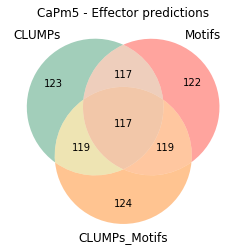

capm5:
['Uncharacterized protein', 'ABC-type dipeptide/ oligopeptide transport system, permease component II', 'Carbohydrate ABC transporter permease', 'Hymolysin-related protein', 'Probable dimethyladenosine transferase (EC 2.1.1.-)', 'ABC-type spermidine/putrescine transport system, permease protein PotC', 'ABC-type cobalt transport system, permease component']


number of proteins non overlapping btw the 3 models: 9 -->  1.7341040462427744%
                seq_id  eff_prob_cl(%)  eff_prob_mf(%)  eff_prob_cl_mf(%)  \
0  CaPm5_contig01_0049            54.0       46.666667               54.0   
1  CaPm5_contig01_0103            50.0       46.666667               50.0   
2  CaPm5_contig01_0148            44.0       50.666667               44.0   
3  CaPm5_contig01_0269            52.0       45.333333               52.0   
4  CaPm5_contig01_0287            52.0       48.000000               52.0   
5  CaPm5_contig01_0290            42.0       50.666667               42.0   
6  CaPm5_contig01_0291            56.0       49.333333               56.0   
7  CaPm5_contig01_0303            50.0       44.000000               50.0   
8  CaPm5_contig01_0382            48.0       53.333333               48.0   

   std_of_3_models_pred_prob(%)  
0                      3.456966  
1                      1.571348  
2                      3.142697  
3            

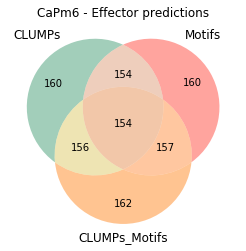

capm6:
['Uncharacterized protein', 'ABC-type cobalt transport protein CbiQ', 'ABC-type spermidine/putrescine transport system, permease protein PotC', 'Probable dimethyladenosine transferase (EC 2.1.1.-)', 'Hemolysin', 'Carbohydrate ABC transporter permease', 'ABC-type dipeptide/ oligopeptide transport system, permease component II']


number of proteins non overlapping btw the 3 models: 9 -->  1.4563106796116505%
                seq_id  eff_prob_cl(%)  eff_prob_mf(%)  eff_prob_cl_mf(%)  \
0  CaPm6_contig01_0093            48.0       53.333333               48.0   
1  CaPm6_contig01_0174            50.0       44.000000               50.0   
2  CaPm6_contig01_0186            56.0       49.333333               56.0   
3  CaPm6_contig01_0187            44.0       53.333333               44.0   
4  CaPm6_contig01_0190            52.0       48.000000               52.0   
5  CaPm6_contig01_0331            44.0       50.666667               44.0   
6  CaPm6_contig01_0376            50.0       46.666667               50.0   
7  CaPm6_contig01_0432            54.0       46.666667               54.0   
8  CaPm6_contig02_0066            50.0       46.666667               50.0   

   std_of_3_models_pred_prob(%)  
0                      2.514157  
1                      2.828427  
2                      3.142697  
3            

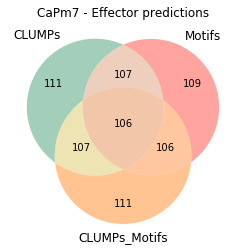

capm7:
['Uncharacterized protein', 'ABC-type dipeptide/ oligopeptide transport system, permease component II', 'ABC-type sugar transport system (Probably encoding FT maltose/maltodextrin transporter subunit, also similar to UgpE), permease component II', 'Hymolysin-related protein', 'ABC-type spermidine/putrescine transport system, permease protein PotC', 'ABC-type cobalt transport system, permease component']


number of proteins non overlapping btw the 3 models: 7 -->  1.4256619144602851%
                seq_id  eff_prob_cl(%)  eff_prob_mf(%)  eff_prob_cl_mf(%)  \
0  CaPm7_contig01_0031            54.0       46.666667               54.0   
1  CaPm7_contig01_0088            54.0       50.666667               54.0   
2  CaPm7_contig01_0134            44.0       50.666667               44.0   
3  CaPm7_contig01_0254            52.0       48.000000               52.0   
4  CaPm7_contig01_0258            56.0       49.333333               56.0   
5  CaPm7_contig01_0270            50.0       44.000000               50.0   
6  CaPm7_contig01_0350            48.0       53.333333               48.0   

   std_of_3_models_pred_prob(%)  
0                      3.456966  
1                      1.571348  
2                      3.142697  
3                      1.885618  
4                      3.142697  
5                      2.828427  
6                      2.514157  
capm11: overlap of 3 models p>=

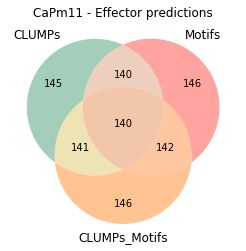

capm11:
['Uncharacterized protein', 'ABC-type dipeptide/ oligopeptide transport system, permease component II', 'Carbohydrate ABC transporter permease', 'Hymolysin-related protein', 'Probable dimethyladenosine transferase (EC 2.1.1.-)', 'ABC-type spermidine/putrescine transport system, permease protein PotC', 'ABC-type cobalt transport system, permease component']


number of proteins non overlapping btw the 3 models: 9 -->  1.618705035971223%
                 seq_id  eff_prob_cl(%)  eff_prob_mf(%)  eff_prob_cl_mf(%)  \
0  CaPm11_contig01_0086            54.0       46.666667               54.0   
1  CaPm11_contig01_0144            50.0       46.666667               50.0   
2  CaPm11_contig01_0189            44.0       50.666667               44.0   
3  CaPm11_contig01_0348            52.0       48.000000               52.0   
4  CaPm11_contig01_0351            42.0       50.666667               42.0   
5  CaPm11_contig01_0352            56.0       49.333333               56.0   
6  CaPm11_contig01_0364            50.0       44.000000               50.0   
7  CaPm11_contig01_0443            48.0       53.333333               48.0   
8  CaPm11_contig01_0493            40.0       50.666667               40.0   

   std_of_3_models_pred_prob(%)  
0                      3.456966  
1                      1.571348  
2                      3.142697  
3   

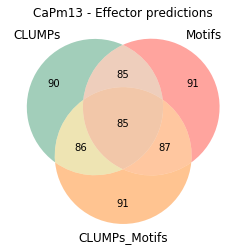

capm13:
['Uncharacterized protein', 'ABC-type cobalt transport system, permease component', 'ABC-type spermidine/putrescine transport system, permease protein PotC', 'Probable dimethyladenosine transferase (EC 2.1.1.-)', 'Hymolysin-related protein', 'Carbohydrate ABC transporter permease', 'ABC-type dipeptide/ oligopeptide transport system, permease component II']


number of proteins non overlapping btw the 3 models: 9 -->  2.050113895216401%
                 seq_id  eff_prob_cl(%)  eff_prob_mf(%)  eff_prob_cl_mf(%)  \
0  CaPm13_contig01_0009            40.0       50.666667               40.0   
1  CaPm13_contig01_0058            48.0       53.333333               48.0   
2  CaPm13_contig01_0137            50.0       44.000000               50.0   
3  CaPm13_contig01_0149            56.0       49.333333               56.0   
4  CaPm13_contig01_0150            42.0       50.666667               42.0   
5  CaPm13_contig01_0153            52.0       48.000000               52.0   
6  CaPm13_contig01_0304            44.0       50.666667               44.0   
7  CaPm13_contig01_0349            50.0       46.666667               50.0   
8  CaPm13_contig01_0402            54.0       46.666667               54.0   

   std_of_3_models_pred_prob(%)  
0                      5.028315  
1                      2.514157  
2                      2.828427  
3   

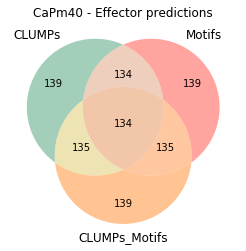

capm40:
['Uncharacterized protein', 'ABC-type cobalt transport system, permease component', 'ABC-type spermidine/putrescine transport system, permease protein PotC', 'Probable dimethyladenosine transferase (EC 2.1.1.-)', 'Hymolysin-related protein', 'Carbohydrate ABC transporter permease', 'ABC-type dipeptide/ oligopeptide transport system, permease component II']


number of proteins non overlapping btw the 3 models: 9 -->  1.6483516483516485%
                 seq_id  eff_prob_cl(%)  eff_prob_mf(%)  eff_prob_cl_mf(%)  \
0  CaPm40_contig01_0009            40.0       50.666667               40.0   
1  CaPm40_contig01_0059            48.0       53.333333               48.0   
2  CaPm40_contig01_0139            50.0       44.000000               50.0   
3  CaPm40_contig01_0151            56.0       49.333333               56.0   
4  CaPm40_contig01_0152            42.0       50.666667               42.0   
5  CaPm40_contig01_0155            52.0       48.000000               52.0   
6  CaPm40_contig01_0312            44.0       50.666667               44.0   
7  CaPm40_contig01_0359            50.0       46.666667               50.0   
8  CaPm40_contig01_0417            54.0       46.666667               54.0   

   std_of_3_models_pred_prob(%)  
0                      5.028315  
1                      2.514157  
2                      2.828427  
3  

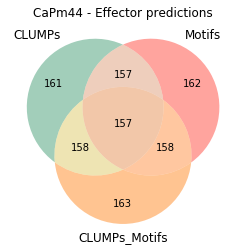

capm44:
['Uncharacterized protein', 'ABC-type dipeptide/ oligopeptide transport system, permease component II', 'Carbohydrate ABC transporter permease', 'Hymolysin-related protein', 'Probable dimethyladenosine transferase (EC 2.1.1.-)', 'ABC-type spermidine/putrescine transport system, permease protein PotC', 'ABC-type cobalt transport system, permease component']


number of proteins non overlapping btw the 3 models: 8 -->  1.376936316695353%
                 seq_id  eff_prob_cl(%)  eff_prob_mf(%)  eff_prob_cl_mf(%)  \
0  CaPm44_contig01_0062            54.0       46.666667               54.0   
1  CaPm44_contig01_0135            50.0       46.666667               50.0   
2  CaPm44_contig01_0181            44.0       50.666667               44.0   
3  CaPm44_contig01_0351            52.0       48.000000               52.0   
4  CaPm44_contig01_0354            42.0       50.666667               42.0   
5  CaPm44_contig01_0367            50.0       44.000000               50.0   
6  CaPm44_contig01_0447            48.0       53.333333               48.0   
7  CaPm44_contig01_0495            40.0       50.666667               40.0   

   std_of_3_models_pred_prob(%)  
0                      3.456966  
1                      1.571348  
2                      3.142697  
3                      1.885618  
4                      4.085506  
5             

In [7]:
## VENN3 diagram 
for s in capms:
    df_pred_cl = pd.read_csv(f"{table_base_dir}capm{s}/model_clumps_on_dataset20230224/probability_of_predictions.tsv",
                                  sep="\t",
                                  header=0)
    df_pred_mf = pd.read_csv(f"{table_base_dir}capm{s}/model_std_on_dataset20230224/probability_of_predictions.tsv",
                                  sep="\t",
                                  header=0)
    df_pred_cl_mf = pd.read_csv(f"{table_base_dir}capm{s}/model_clumps_std_on_dataset20230224/probability_of_predictions.tsv",
                                  sep="\t",
                                  header=0)
    df_pred_cl_eff = df_pred_cl[df_pred_cl["effector_prob"] >= 0.50]
    df_pred_mf_eff = df_pred_mf[df_pred_mf["effector_prob"] >= 0.50]
    df_pred_cl_mf_eff = df_pred_cl_mf[df_pred_cl_mf["effector_prob"] >= 0.5]


    # m1 = cl
    # m2 = mf
    # m3 = cl_mf
    # _s = belonging to pms
    # l1, 2, 3 = list of prob in m1, 2, 3 respectively
    l1_s = list(df_pred_cl_eff["seq_id"])
    l2_s = list(df_pred_mf_eff["seq_id"])
    l3_s = list(df_pred_cl_mf_eff["seq_id"])

    m1_s = len(df_pred_cl_eff)
    m2_s = len(df_pred_mf_eff)
    m3_s = len(df_pred_cl_mf_eff)
    m1_m2 = len(list(set(l1_s) & set(l2_s)))
    m2_m3 = len(list(set(l2_s) & set(l3_s)))
    m3_m1 = len(list(set(l3_s) & set(l1_s))) 
    m1_m2_m3 = len(list(set(l1_s) & set(l2_s) & set(l3_s)))
    print(f"capm{s}: overlap of 3 models p>=50: {((m1_m2_m3/m1_s) + (m1_m2_m3/m2_s) + (m1_m2_m3/m3_s))/3}")
    diff_m1_m2_m3 = list(set(l1_s) - set(l2_s) - set(l3_s))
    print(diff_m1_m2_m3)
    df_diff_cl = df_pred_cl[df_pred_cl["seq_id"].isin(diff_m1_m2_m3)]
    df_diff_mf = df_pred_mf[df_pred_mf["seq_id"].isin(diff_m1_m2_m3)]
    df_diff_cl_mf = df_pred_cl_mf[df_pred_cl_mf["seq_id"].isin(diff_m1_m2_m3)]
    
    print(f"clumps: {df_diff_cl}")
    print(f"motifs: {df_diff_mf}")
    print(f"clumps_motifs: {df_diff_cl_mf}")
    
    # depict venn diagram
    venn3(subsets=(m1_s, m2_s, m1_m2, m3_s, m3_m1, m2_m3, m1_m2_m3), 
          set_labels=('CLUMPs', 'Motifs', 'CLUMPs_Motifs'), 
          set_colors=("#3D9970", "#FF4136", "#FF851B"), alpha=0.48)

    # # outline of circle line style and width
    venn3_circles(subsets=(m1_s, m2_s, m1_m2, m3_s, m3_m1, m2_m3, m1_m2_m3), linewidth=0)

    # title of the venn diagram
    plt.title(f"CaPm{s} - Effector predictions")
    plt.show()


    m1_diff_m2 = list(set(l1_s) - set(l2_s))
    m2_diff_m3 = list(set(l2_s) - set(l3_s))
    m1_diff_m3 = list(set(l1_s) - set(l3_s))

    unique_non_overlap = np.unique(m1_diff_m2 + m2_diff_m3 + m1_diff_m3)
    
    annotations = pd.read_csv(f"{annot_base_dir}CaPm{s}_annot_table.csv", sep="\t", header=0)    
    corr_annot = annotations["Protein names"][annotations["ID"].isin(unique_non_overlap)]
    print(f"capm{s}:")   
#     print(len(corr_annot[corr_annot["Entry"].isin(mali_eff)]))
    print(list(corr_annot.value_counts().index))
    df = pd.DataFrame({"Protein name": list(corr_annot.value_counts().index), "value counts": list(corr_annot.value_counts())})
    fig = px.bar(df, y="Protein name", x='value counts', text_auto='.2s',
            title="Controlled text sizes, positions and angles")
    fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
    fig.show()
    
    m1_nonoverlap = list(df_pred_cl["effector_prob"][df_pred_cl["seq_id"].isin(unique_non_overlap)])
    m2_nonoverlap = list(df_pred_mf["effector_prob"][df_pred_mf["seq_id"].isin(unique_non_overlap)])
    m3_nonoverlap = list(df_pred_cl["effector_prob"][df_pred_cl["seq_id"].isin(unique_non_overlap)])
    stds = []
    for i in range(len(unique_non_overlap)):
        stds.append(np.std([m1_nonoverlap[i], m2_nonoverlap[i], m3_nonoverlap[i]]))
    
    df_nonoverlap_prob = pd.DataFrame({"seq_id": unique_non_overlap,
                                      "eff_prob_cl(%)": np.array(m1_nonoverlap)*100,
                                      "eff_prob_mf(%)": np.array(m2_nonoverlap)*100,
                                      "eff_prob_cl_mf(%)": np.array(m3_nonoverlap)*100,
                                      "std_of_3_models_pred_prob(%)": np.array(stds)*100})
    print(f"number of proteins non overlapping btw the 3 models: {len(df_nonoverlap_prob)} -->  {(len(df_nonoverlap_prob)/len(df_pred_cl))*100}%")
    df_nonoverlap_prob.to_csv(f"{table_base_dir}capm{s}/capm{s}_nonoverlap_3models.tsv", sep="\t", index=False)
    print(df_nonoverlap_prob)

In [130]:
import plotly.express as px

## HITMAP of protein probaility to be effectors in 3 models 
for s in capms:
    df_pred_cl = pd.read_csv(f"{table_base_dir}capm{s}/model_clumps_on_dataset20230224/probability_of_predictions.tsv",
                                  sep="\t",
                                  header=0)
    df_pred_mf = pd.read_csv(f"{table_base_dir}capm{s}/model_std_on_dataset20230224/probability_of_predictions.tsv",
                                  sep="\t",
                                  header=0)
    df_pred_cl_mf = pd.read_csv(f"{table_base_dir}capm{s}/model_clumps_std_on_dataset20230224/probability_of_predictions.tsv",
                                  sep="\t",
                                  header=0)
    df_pred_cl_eff = df_pred_cl[["effector_prob", "seq_id"]][df_pred_cl["effector_prob"] >= 0.90]
    df_pred_mf_eff = df_pred_mf[["effector_prob", "seq_id"]][df_pred_mf["effector_prob"] >= 0.90]
    df_pred_cl_mf_eff = df_pred_cl_mf[["effector_prob", "seq_id"]][df_pred_cl_mf["effector_prob"] >= 0.9]
    prot_names = list(df_pred_cl["seq_id"][df_pred_cl["effector_prob"] >= 0.90])
    dfs = df_pred_cl_eff.merge(df_pred_mf_eff, on="seq_id", how="left").fillna(0)
    dfs = dfs.merge(df_pred_cl_mf_eff, on="seq_id", how="left").fillna(0)
    print(dfs)
    data=[list(dfs["effector_prob_x"]), list(dfs["effector_prob_y"]), list(dfs["effector_prob"])]
    
    fig = px.imshow(data,
                    labels=dict(x="RF Models", y=f"Proteins of CaPm{s}", color="effector_probability"),
                    x=[seq_id for seq_id in prot_names],
                    y=['CLUMPs', 'Motifs', 'CLUMPs_Motifs']
                   )
    fig.update_xaxes(side="top")
    fig.show()

     effector_prob_x               seq_id  effector_prob_y  effector_prob
0               0.84  CaPm5_contig01_0004         0.786667           0.78
1               1.00  CaPm5_contig01_0005         1.000000           1.00
2               0.60  CaPm5_contig01_0006         0.560000           0.70
3               0.92  CaPm5_contig01_0007         0.906667           0.96
4               0.98  CaPm5_contig01_0008         0.986667           0.98
..               ...                  ...              ...            ...
118             0.90  CaPm5_contig02_0057         0.893333           0.88
119             1.00  CaPm5_contig02_0064         1.000000           1.00
120             0.90  CaPm5_contig02_0066         0.933333           0.94
121             0.98  CaPm5_contig02_0067         0.946667           0.88
122             1.00  CaPm5_contig02_0076         0.973333           0.98

[123 rows x 4 columns]


     effector_prob_x               seq_id  effector_prob_y  effector_prob
0               0.80  CaPm6_contig01_0008         0.706667           0.84
1               0.88  CaPm6_contig01_0009         0.840000           0.90
2               0.98  CaPm6_contig01_0010         1.000000           0.98
3               0.98  CaPm6_contig01_0011         0.960000           0.96
4               0.98  CaPm6_contig01_0012         0.920000           0.94
..               ...                  ...              ...            ...
155             0.94  CaPm6_contig03_0023         0.946667           0.98
156             0.90  CaPm6_contig03_0025         0.906667           0.94
157             1.00  CaPm6_contig03_0026         0.986667           0.96
158             0.68  CaPm6_contig03_0034         0.733333           0.68
159             1.00  CaPm6_contig03_0035         0.973333           0.98

[160 rows x 4 columns]


     effector_prob_x               seq_id  effector_prob_y  effector_prob
0               0.90  CaPm7_contig01_0001         0.786667           0.96
1               0.98  CaPm7_contig01_0002         0.946667           0.98
2               0.92  CaPm7_contig01_0003         0.933333           0.94
3               0.62  CaPm7_contig01_0004         0.586667           0.54
4               0.88  CaPm7_contig01_0005         0.933333           0.94
..               ...                  ...              ...            ...
106             0.76  CaPm7_contig02_0018         0.813333           0.74
107             0.62  CaPm7_contig02_0019         0.813333           0.72
108             0.68  CaPm7_contig02_0021         0.746667           0.82
109             1.00  CaPm7_contig02_0024         1.000000           0.98
110             0.92  CaPm7_contig02_0027         0.960000           0.96

[111 rows x 4 columns]


     effector_prob_x                seq_id  effector_prob_y  effector_prob
0               0.94  CaPm11_contig01_0002         0.933333           0.96
1               1.00  CaPm11_contig01_0010         0.853333           0.82
2               0.78  CaPm11_contig01_0014         0.706667           0.86
3               1.00  CaPm11_contig01_0017         1.000000           1.00
4               1.00  CaPm11_contig01_0018         1.000000           1.00
..               ...                   ...              ...            ...
140             1.00  CaPm11_contig02_0038         0.933333           0.96
141             1.00  CaPm11_contig02_0039         0.973333           1.00
142             0.76  CaPm11_contig02_0043         0.840000           0.78
143             0.80  CaPm11_contig02_0046         0.680000           0.76
144             0.70  CaPm11_contig02_0048         0.773333           0.76

[145 rows x 4 columns]


    effector_prob_x                seq_id  effector_prob_y  effector_prob
0              0.98  CaPm13_contig01_0001         0.920000           0.94
1              0.68  CaPm13_contig01_0002         0.760000           0.74
2              0.88  CaPm13_contig01_0003         0.960000           0.98
3              0.68  CaPm13_contig01_0005         0.560000           0.70
4              0.88  CaPm13_contig01_0006         0.813333           0.84
..              ...                   ...              ...            ...
85             0.64  CaPm13_contig01_0433         0.693333           0.60
86             0.92  CaPm13_contig01_0435         0.973333           1.00
87             1.00  CaPm13_contig01_0436         1.000000           1.00
88             1.00  CaPm13_contig01_0437         0.973333           0.98
89             0.98  CaPm13_contig01_0438         0.933333           0.98

[90 rows x 4 columns]


     effector_prob_x                seq_id  effector_prob_y  effector_prob
0               0.98  CaPm40_contig01_0001         0.920000           0.94
1               0.68  CaPm40_contig01_0002         0.760000           0.74
2               0.88  CaPm40_contig01_0003         0.960000           0.98
3               0.68  CaPm40_contig01_0005         0.560000           0.70
4               0.88  CaPm40_contig01_0006         0.813333           0.84
..               ...                   ...              ...            ...
134             1.00  CaPm40_contig02_0064         1.000000           1.00
135             1.00  CaPm40_contig02_0066         0.973333           1.00
136             1.00  CaPm40_contig02_0069         0.960000           0.96
137             0.76  CaPm40_contig02_0071         0.840000           0.78
138             0.64  CaPm40_contig02_0076         0.666667           0.72

[139 rows x 4 columns]


     effector_prob_x                seq_id  effector_prob_y  effector_prob
0               0.74  CaPm44_contig01_0001         0.693333           0.68
1               1.00  CaPm44_contig01_0002         0.986667           1.00
2               0.84  CaPm44_contig01_0008         0.813333           0.80
3               0.88  CaPm44_contig01_0009         0.840000           0.90
4               0.98  CaPm44_contig01_0010         1.000000           0.98
..               ...                   ...              ...            ...
156             1.00  CaPm44_contig03_0002         0.960000           0.98
157             0.92  CaPm44_contig03_0004         0.906667           0.94
158             0.68  CaPm44_contig03_0005         0.813333           0.72
159             1.00  CaPm44_contig03_0009         0.986667           1.00
160             0.90  CaPm44_contig03_0011         0.946667           0.96

[161 rows x 4 columns]


# ON AT


In [231]:
for mod in models_name:
    df_prob_pred = pd.read_csv(f"{base_dir}random_forest/on_AT/probability_of_predictions_{mod}.tsv", sep="\t",
                              header=0)
    print(mod)
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in (df_prob_pred["seq_id"]):
        i_n = i.strip().split("|")[1]
#         print(df_prob_pred["effector_prob"][df_prob_pred["seq_id"] == i] >0.5)
        
        if i_n in mali_eff:
#             print(df_prob_pred["effector_prob"][df_prob_pred["seq_id"] == i])
            tp += 1
        elif i_n not in mali_eff and float(df_prob_pred["effector_prob"][df_prob_pred["seq_id"] == i]) >= 1:
            fp += 1
        elif i_n not in mali_eff and float(df_prob_pred["effector_prob"][df_prob_pred["seq_id"] == i]) < 0.5:
            tn += 1
        elif i_n in mali_eff and float(df_prob_pred["effector_prob"][df_prob_pred["seq_id"] == i]) < 0.5:
            fn += 1
    print(tp, tn, fp, fn)
    print(f"accuracy: \nPrecision: {tp/(tp+fp)}\nRecall: {tp/(tp+fn)}")
    
    df_prob_pred90 = df_prob_pred[df_prob_pred["effector_prob"] >= 0.99]
    ## which proteins = protein names have a prob to be eff >= 90% and which is their occurrence
    protein_names = []
    for record in SeqIO.parse(f"{base_dir}datasets/uniproteomes/capmali_os482235_uniproteome_complete.fasta",
                             "fasta"):
        if record.id in list(df_prob_pred90["seq_id"]):
            protein_names.append(record.description[record.description.find(" ") + 1 :record.description.find("OS")].strip())
    s_protein_names = pd.Series(protein_names).value_counts()
    print(s_protein_names)
    
# l1_s = list(df_pred_cl_eff["seq_id"])
# l2_s = list(df_pred_mf_eff["seq_id"])
# l3_s = list(df_pred_cl_mf_eff["seq_id"])

# m1_s = len(df_pred_cl_eff)
# m2_s = len(df_pred_mf_eff)
# m3_s = len(df_pred_cl_mf_eff)
# m1_m2 = len(list(set(l1_s) & set(l2_s)))
# m2_m3 = len(list(set(l2_s) & set(l3_s)))
# m3_m1 = len(list(set(l3_s) & set(l1_s))) 
# m1_m2_m3 = len(list(set(l1_s) & set(l2_s) & set(l3_s)))
# print(f"capm{s}: overlap of 3 models p>=90: {((m1_m2_m3/m1_s) + (m1_m2_m3/m2_s) + (m1_m2_m3/m3_s))/3}")

# # depict venn diagram
# venn3(subsets=(m1_s, m2_s, m1_m2, m3_s, m3_m1, m2_m3, m1_m2_m3), 
#       set_labels=('CLUMPs', 'Motifs', 'CLUMPs_Motifs'), 
#       set_colors=("orange", "blue", "red"), alpha=0.8)

# # # outline of circle line style and width
# venn3_circles(subsets=(m1_s, m2_s, m1_m2, m3_s, m3_m1, m2_m3, m1_m2_m3), linewidth=0)

# # title of the venn diagram
# plt.title(f"CaPm{s} - Effector predictions")
# plt.show()


clumps
4 352 16 0
accuracy: 
Precision: 0.2
Recall: 1.0
SVM_signal domain-containing protein          4
Lipoprotein                                   3
Effector                                      3
Probable lysophospholipase                    1
YneF family protein                           1
Viral A-type inclusion protein                1
Nitroreductase-like protein                   1
Uncharacterized protein                       1
Serine/threonine protein kinase               1
3D domain-containing protein                  1
Phosphatidylserine decarboxylase proenzyme    1
Ig-like_bact domain-containing protein        1
YD repeat-containing protein                  1
dtype: int64
std
4 352 9 0
accuracy: 
Precision: 0.3076923076923077
Recall: 1.0
SVM_signal domain-containing protein    4
Effector                                3
Exported protein                        1
YneF family protein                     1
Uncharacterized protein                 1
Sugar porter family MFS transp

# ON FDs

Chard_FD: overlap of 3 models p>=90: 0.8157390602944142


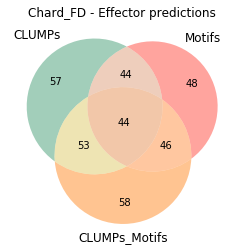

hypothetical protein                                             30
SVM family protein                                                3
2-hydroxycarboxylate transporter family protein                   2
locus_tag=M6G77_00625                                             1
locus_tag=M6G77_01210                                             1
AAA family ATPase                                                 1
energy-coupling factor transporter transmembrane protein EcfT     1
locus_tag=M6G77_01770                                             1
signal peptidase I                                                1
YneF family protein                                               1
locus_tag=M6G77_02470                                             1
zinc ABC transporter substrate-binding protein                    1
dtype: int64
Pgris_SVinc_FD: overlap of 3 models p>=90: 0.8076719576719577


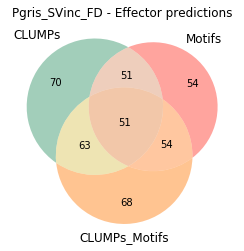

hypothetical protein                                             60
SVM family protein                                                6
2-hydroxycarboxylate transporter family protein                   4
locus_tag=M6G77_01770                                             2
ABC transporter substrate-binding protein                         2
zinc ABC transporter substrate-binding protein                    2
signal peptidase I                                                2
YneF family protein                                               2
AAA family ATPase                                                 2
locus_tag=M6G77_01210                                             2
energy-coupling factor transporter transmembrane protein EcfT     1
locus_tag=M6G77_00625                                             1
locus_tag=M6G77_02470                                             1
trypsin-like peptidase domain-containing protein                  1
RluA family pseudouridine synthase              

In [268]:
fds = ["Chard_FD", "Pgris_SVinc_FD"]
dict_prob_pred_90_models = {}

for mod in models_name:
    dict_prob_pred_90_models[mod] = {}
    for f in fds:
        df_prob_pred = pd.read_csv(f"{base_dir}random_forest/on_FDs_20230307/{f}/probability_of_predictions_{mod}.tsv", sep="\t",
                                  header=0)

        df_prob_pred90 = df_prob_pred[df_prob_pred["effector_prob"] >= 0.90]
        df_blastp_fdref = pd.read_csv(f"{base_dir}random_forest/on_FDs_20230307/{f}/blastp_{f}_{mod}mean_eff_90_AT_90.tsv",
                                     sep=" ",
                                     header=None)
        ## which proteins = protein names have a prob to be eff >= 90% and which is their occurrence
        protein_names = []
#         for record in SeqIO.parse(f"/home/giulia/Workspace/PhytoPhD/caliag/ref/CaPvitis_first_complete_proteome.fasta",
#                                  "fasta"):
#             if record.id in list(df_blastp_fdref[1]):
#                 desc = record.description.split("[")[2].replace("]", "").replace("protein=", "").strip()
#                 protein_names.append(desc)
#         s_protein_names = pd.Series(protein_names).value_counts()
#         print(s_protein_names)

        dict_prob_pred_90_models[mod][f] = list(df_prob_pred["seq_id"][df_prob_pred["effector_prob"] >= 0.90])

for f in fds:
    # m1 = cl
    # m2 = mf
    # m3 = cl_mf
    # _s = belonging to pms
    # l1, 2, 3 = list of prob in m1, 2, 3 respectively
    l1_s = dict_prob_pred_90_models[models_name[0]][f]
    l2_s = dict_prob_pred_90_models[models_name[1]][f]
    l3_s = dict_prob_pred_90_models[models_name[2]][f]

    m1_s = len(dict_prob_pred_90_models[models_name[0]][f])
    m2_s = len(dict_prob_pred_90_models[models_name[1]][f])
    m3_s = len(dict_prob_pred_90_models[models_name[2]][f])
    m1_m2 = len(list(set(l1_s) & set(l2_s)))
    m2_m3 = len(list(set(l2_s) & set(l3_s)))
    m3_m1 = len(list(set(l3_s) & set(l1_s))) 
    m1_m2_m3 = len(list(set(l1_s) & set(l2_s) & set(l3_s)))
    print(f"{f}: overlap of 3 models p>=90: {((m1_m2_m3/m1_s) + (m1_m2_m3/m2_s) + (m1_m2_m3/m3_s))/3}")

    # depict venn diagram
    venn3(subsets=(m1_s, m2_s, m1_m2, m3_s, m3_m1, m2_m3, m1_m2_m3), 
          set_labels=('CLUMPs', 'Motifs', 'CLUMPs_Motifs'), 
          set_colors=("#3D9970", "#FF4136", "#FF851B"), alpha=0.48)

    # # outline of circle line style and width
    venn3_circles(subsets=(m1_s, m2_s, m1_m2, m3_s, m3_m1, m2_m3, m1_m2_m3), linewidth=0)

    # title of the venn diagram
    plt.title(f"{f} - Effector predictions")
    plt.show()
    
    overlap_list = list(set(l1_s) & set(l2_s) & set(l3_s))
    df_blastp_fdref = pd.read_csv(f"{base_dir}random_forest/on_FDs_20230307/{f}/blastp_{f}_clumps_stdmean_eff_90_AT_90.tsv",
                                     sep=" ",
                                     header=None)
    corr_annot = list(df_blastp_fdref[1][df_blastp_fdref[0].isin(overlap_list)])
    for record in SeqIO.parse(f"/home/giulia/Workspace/PhytoPhD/caliag/ref/CaPvitis_first_complete_proteome.fasta",
                                 "fasta"):
        if record.id in corr_annot:
            desc = record.description.split("[")[2].replace("]", "").replace("protein=", "").strip()
            protein_names.append(desc)
    s_protein_names = pd.Series(protein_names).value_counts()
    print(s_protein_names)